[Link to source code](https://github.com/AidMMcMillan/AidMMcMillan.github.io/blob/main/posts/blog4/linear_regression.py)

In this blog post I will be implement linear regression in two ways, using an analytical method and then using gradient descent. Then, I will perform some experiments on the method to see how the the number of features affects the training validation scores. Lastly, I will compare my linear regression method to scikit-learn's LASSO method and compare results.

# Implementation of Linear Regression with Analytical Solution and Gradient Descent

To implement linear regression in Python, I created a class called `LinearRegression`. Within that class, I defined the `fit` method, which allows for both analytical and gradient descent approaches.

The analytical method uses the formula for the optimal weight vector, as derived in the lecture notes. It involves matrix inversion and several matrix multiplications. Here is the relevant code snippet:
```python
self.w = np.linalg.inv(P) @ q
```

Alternatively, the gradient descent method updates the weight vector iteratively based on the gradient of the loss function. The number of iterations `max_epochs` and the learning rate `alpha` can be specified as parameters. Here is the code for gradient descent:
```python
self.w = np.random.rand(X_.shape[1])
for num in range(max_epochs):
    self.w -= self.gradient(P, q) * alpha
```

By implementing both the analytical solution and gradient descent approaches, this code provides flexibility in choosing the method that best suits the problem at hand. It is likely that he analytical solution is more computationally efficient for small to moderate-sized datasets, while gradient descent is suitable for larger datasets.

### Calculating the Gradient of the Loss Function

To calculate the gradient of the loss function, I needed to derive the formula for the gradient with respect to the weight vector. In the case of linear regression, the loss function is the mean squared error (MSE).

The gradient of the MSE loss function with respect to the weight vector $\mathbf{w}$ can be calculated as follows:

$$\nabla L(\mathbf{w}) = 2 \left(\mathbf{X}^T \mathbf{X} \mathbf{w} - \mathbf{X}^T \mathbf{y}\right)$$

In the code, the gradient is computed using the `self.gradient` method:
```python
def gradient(self, P, q):
    return 2 * (P @ self.w - q)
```

Here, `P` corresponds to $\mathbf{X}^T \mathbf{X}$ and `q` corresponds to $\mathbf{X}^T \mathbf{y}$, both of which are calculated beforehand, because they are constant with each interation. 

By using this gradient in the gradient descent update step, the weight vector is iteratively adjusted to minimize the loss function and improve the performance of the linear regression model.

### Proof of Concept

In order to show my analytic linear regression in action,  I used the make_data function from my ```linear_regression``` class to create roughly linear data. Then I fit my linear regression using the ```fit``` method, setting the method argument to ```"analytic"``` . Lastly I ploted the data and the resulting line:

Training score = 0.5298
Validation score = 0.6594
w = [0.83162321 0.52136118]


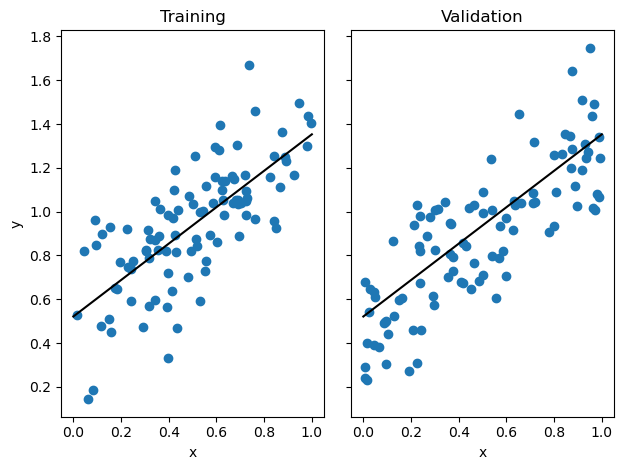

In [91]:
import numpy as np
from matplotlib import pyplot as plt
import linear_regression as lin_reg

from sklearn.datasets import make_blobs, make_circles

np.random.seed(123)

n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# Create some data
X_train, y_train, X_val, y_val = lin_reg.make_data(n_train, n_val, p_features, noise)

# Plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

# Fit model
LR = lin_reg.LinearRegression()
LR.fit(X_train, y_train, method = "analytic")

print(f"Training score = {LR.score(lin_reg.pad(X_train), y_train).round(4)}")
print(f"Validation score = {LR.score(lin_reg.pad(X_val), y_val).round(4)}")
print(f"w = {LR.w}")

lin_reg.draw_line(LR.w, 0, 1, "black", axarr)

We also see the same values when run using the ```"gradient"``` method. Here I also ploted the loss function over each epoch. As we can see it fits quite quickly with a good value for alpha:

Training score = 0.5298
Validation score = 0.6593
w = [0.83086072 0.521764  ]


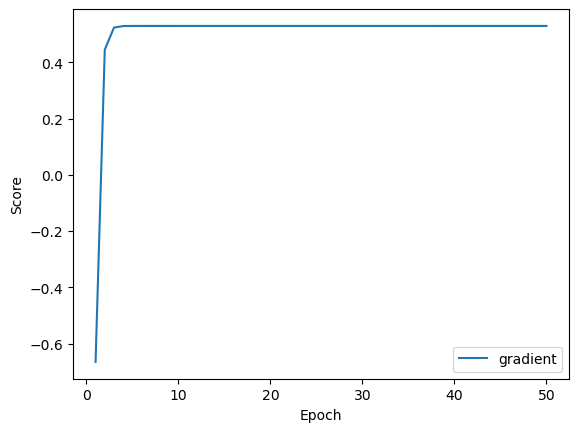

In [88]:
np.random.seed(123)

LR = lin_reg.LinearRegression()
LR.fit(X_train, y_train, max_epochs = 50, alpha = 0.005, method = "gradient")

num_steps = len(LR1.score_history)
plt.plot(np.arange(num_steps)+1, LR1.score_history, label = "gradient")

xlab = plt.xlabel("Epoch")
ylab = plt.ylabel("Score")

print(f"Training score = {LR.score(lin_reg.pad(X_train), y_train).round(4)}")
print(f"Validation score = {LR.score(lin_reg.pad(X_val), y_val).round(4)}")
print(f"w = {LR.w}")

legend = plt.legend()

# Experiment: Impact of Increasing Number of Features on Linear Regression

Next, I cunducted an experiment to understand the impact of increasing the number of features on linear regression performance. The goal was to examine how the training and validation scores change as the number of features used in the model increases, while keeping the number of training points constant.

Scores at p_features = n_train-1:
Training score = 1.0
Validation score = n_train-1 = 0.4097


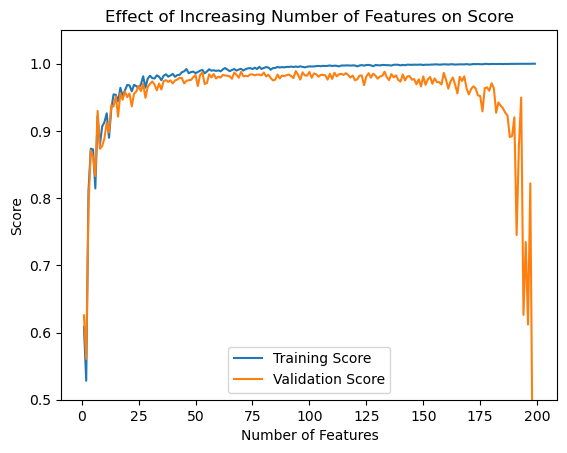

In [121]:
np.random.seed(123)

n_train = 200
n_val = 200
noise = 0.2

# Make lists to store the scores with each run
train_scores = []
val_scores = []

p_features_range = range(1, n_train)

# Iterate over different values of p_features
for p_features in p_features_range:
    # Create data with the current p_features value
    X_train, y_train, X_val, y_val = lin_reg.make_data(n_train, n_val, p_features, noise)
    
    #Fit models
    LR = lin_reg.LinearRegression()
    LR.fit(X_train, y_train, method="analytic")
    
    # Add training and validation scores to list
    train_score = LR.score(lin_reg.pad(X_train), y_train)
    val_score = LR.score(lin_reg.pad(X_val), y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

#Print final validation and training score
print("Scores at p_features = n_train-1:")
print(f"Training score = {train_scores[-1].round(4)}")
print(f"Validation score = n_train-1 = {val_scores[-2].round(4)}")

# Plot the scores
plt.plot(p_features_range, train_scores, label="Training Score")
plt.plot(p_features_range, val_scores, label="Validation Score")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.ylim(0.5, max(train_scores)+0.05)
plt.title("Effect of Increasing Number of Features on Score")
plt.legend()
plt.show()

The results of the experiment revealed two interesting patterns:

1. **As the number of features increased, the training score generally improved.** This is expected since the model had more information to fit the training data.

2. **The validation score initially increased but then started to decrease after reaching a certain number of features.** This suggests that the model started to overfit the data as the number of features increased, resulting in a decrease in its ability to generalize to unseen data (the validation set).

The experiment demonstrates the trade-off between model complexity (captured by the number of features) and overfitting. It highlights the importance of finding an optimal number of features to achieve good generalization.

### Experiment with LASSO

According to the blog post instructions, The LASSO algorithm uses a modified loss function with a regularization term:

$$L(\mathbf{w}) = \lVert \mathbf{X}\mathbf{w}- \mathbf{y} \rVert_2^2 + \alpha \lVert \mathbf{w}' \rVert_1\;$$

Where $\mathbf{w}'$ is all of the values in $\mathbf{w}$ except the last.

I will now attempt the same experiment using LASSO regularization to see the changing effect:

Scores at p_features = n_train-1:
Training score = 0.9995
Validation score = 0.832


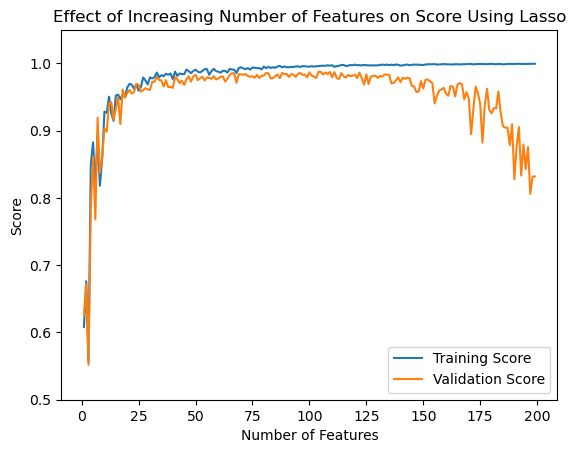

In [120]:
from sklearn.linear_model import Lasso

np.random.seed(123)

n_train = 200
n_val = 200
noise = 0.2

# Make lists to store the scores with each run
train_scores = []
val_scores = []

p_features_range = range(1, n_train)

# Iterate over different values of p_features
for p_features in p_features_range:
    # Create data with the current p_features value
    X_train, y_train, X_val, y_val = lin_reg.make_data(n_train, n_val, p_features, noise)
    
    #Fit models
    L = Lasso(alpha = 0.0005)
    L.fit(X_train, y_train)
    
    # Add training and validation scores to list
    train_score = L.score(X_train, y_train)
    val_score = L.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)
    
#Print final validation and training score
print("Scores at p_features = n_train-1:")
print(f"Training score = {train_scores[-1].round(4)}")
print(f"Validation score = {val_scores[-2].round(4)}")

# Plot the scores
plt.plot(p_features_range, train_scores, label="Training Score")
plt.plot(p_features_range, val_scores, label="Validation Score")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.ylim(0.5, max(train_scores)+0.05)
plt.title("Effect of Increasing Number of Features on Score Using Lasso")
plt.legend()
plt.show()

Using LASSO we can see that there is still overfitting but there at the very extreme end (as p_features nears n_features) the validation score does not stray nearly as far from the training score as it did with my implementation of linear regression. 